In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('glassdoor_jobs.csv')
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [3]:
df.shape

(956, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    int64  
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Competitors        956 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 112.2+ KB


In [5]:
# Salary parsing

df = df[df['Salary Estimate']!='-1']

salary = df['Salary Estimate'].apply(lambda x : x.split('(')[0])

minus_kd = salary.apply(lambda x : x.replace('$','').replace('K',''))

min_hr = minus_kd.apply (lambda x : x.lower().replace('per hour','').replace('employer provided salary:',''))

df['min_salary'] = min_hr.apply(lambda x: x.split('-')[0]).astype(int)

df['max_salary'] = min_hr.apply(lambda x: x.split('-')[1]).astype(int)

df['average_salary'] = (df['max_salary']+df['min_salary']) / 2 


In [6]:
df.shape

(742, 18)

In [9]:
# Company name text only
df['Company_txt'] = df.apply(lambda x: x['Company Name'] if x['Rating']<0 else x['Company Name'][:-3],axis=1)

In [10]:
# State field
df['job_state'] = df['Location'].apply(lambda x : x.split(',')[1])

df['same_state'] = df.apply(lambda x : 1 if x.Location == x.Headquarters else 0,axis=1)

In [11]:
# Age of company
df['age'] = df.Founded.apply(lambda x : x if x<1 else 2023- x)

In [12]:
# Parsing of job description 
# python , excel , r studio , spark , aws 
df['python_yn'] = df['Job Description'].apply(lambda x : 1 if 'python' in x.lower() else 0 )

df['excel_yn'] = df['Job Description'].apply(lambda x : 1 if 'excel' in x.lower() else 0 )

df['r_yn'] = df['Job Description'].apply(lambda x : 1 if 'r-studio' in x.lower() else 0 )

df['spark_yn'] = df['Job Description'].apply(lambda x : 1 if 'spark' in x.lower() else 0 )

df['aws_yn'] = df['Job Description'].apply(lambda x : 1 if 'aws' in x.lower() else 0 )

In [13]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [15]:
df['hourly'] = df['Salary Estimate'].apply(lambda x: 1 if 'per hour' in x.lower() else 0)
df['company_txt'] = df.apply(lambda x: x['Company Name'] if x['Rating'] <0 else x['Company Name'][:-3], axis = 1)

In [16]:
df['Job Title'].value_counts()

Data Scientist                     131
Data Engineer                       53
Senior Data Scientist               34
Data Analyst                        15
Senior Data Engineer                14
                                  ... 
Data Scientist/ML Engineer           1
Sr. Data Scientist                   1
Data Engineer 4 - Contract           1
Data Analyst - Asset Management      1
Machine Learning Engineer (NLP)      1
Name: Job Title, Length: 264, dtype: int64

In [17]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [18]:
##  Job title and seniority 
df['job_simp'] = df['Job Title'].apply(title_simplifier)
df['job_simp'].value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
manager            22
mle                22
director           14
Name: job_simp, dtype: int64

In [19]:
df['seniority'] = df['Job Title'].apply(seniority)
df['seniority'].value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [20]:
##  Fix state Los Angeles 
df['job_state']= df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df.job_state.value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
WI     10
UT     10
IN     10
AZ      9
MO      9
AL      8
GA      6
DE      6
KY      6
MI      6
CT      5
IA      5
LA      4
OR      4
NE      4
NM      3
KS      3
ID      2
MN      2
RI      1
SC      1
Name: job_state, dtype: int64

In [21]:
##  Job description length 
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']


0      2555
1      4828
2      3495
3      3926
4      2748
       ... 
950    6219
951    6167
952    3107
953    1678
955    3710
Name: desc_len, Length: 742, dtype: int64

In [22]:
##  Competitor count
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)


In [23]:
##  hourly wage to annual 

df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis =1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis =1)
df[df.hourly ==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
197,1,34,48
209,1,42,68
240,1,36,50
247,1,42,68
257,1,30,50
307,1,34,48
337,1,42,68
427,1,36,50
437,1,48,78
456,1,42,68


In [24]:
##  remove new line from job title
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n', ''))

<Axes: >

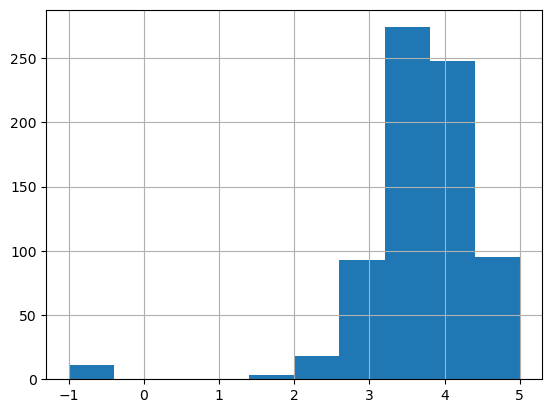

In [25]:
df.Rating.hist()

<Axes: >

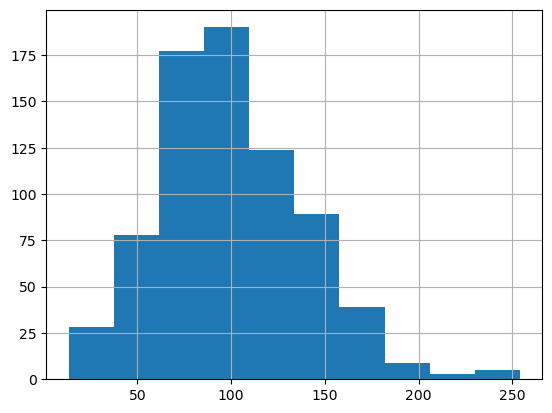

In [26]:
df.average_salary.hist()

<Axes: >

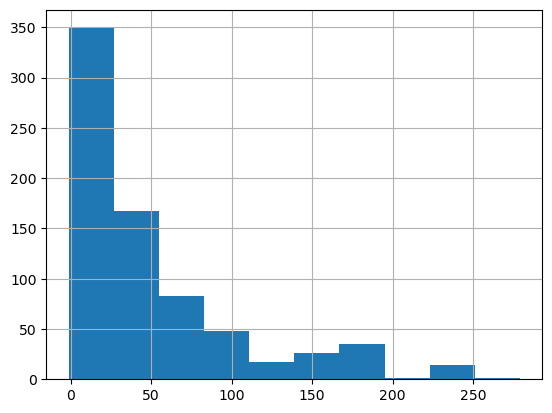

In [27]:
df.age.hist()


<Axes: >

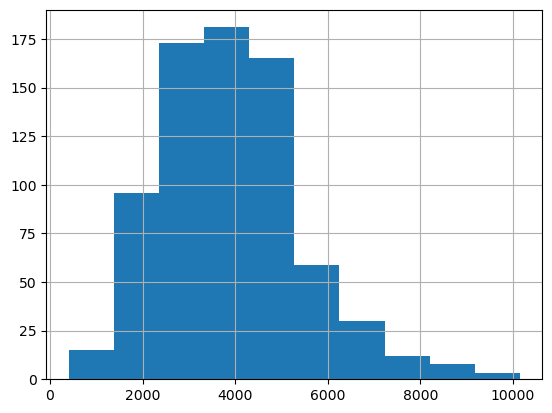

In [28]:
df.desc_len.hist()

<Axes: >

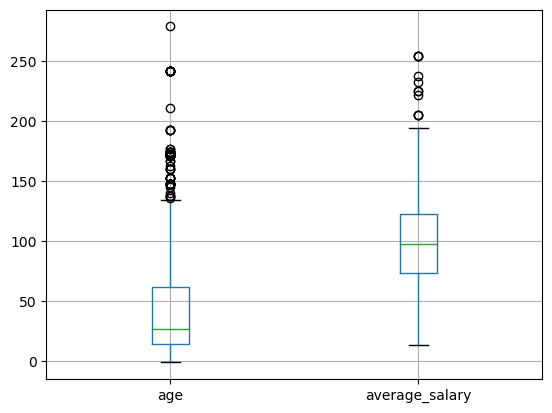

In [29]:
df.boxplot(column = ['age','average_salary'])

<Axes: >

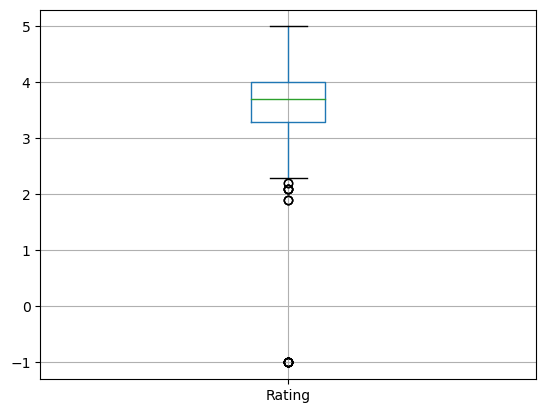

In [30]:
df.boxplot(column='Rating')

<Axes: >

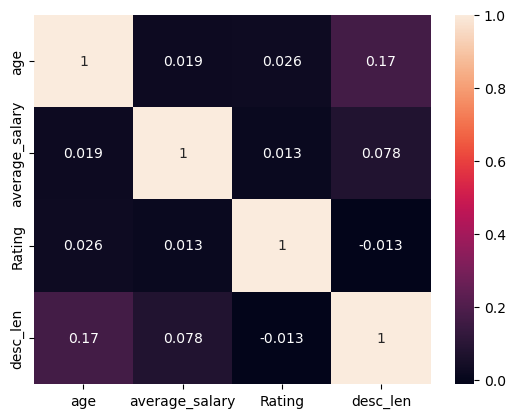

In [31]:
corr = df[['age','average_salary','Rating','desc_len']].corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,annot=True)

In [32]:
cat_columns = df.select_dtypes(include=['category', 'object']).columns
cat_columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Company Name',
       'Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry',
       'Sector', 'Revenue', 'Competitors', 'Company_txt', 'job_state',
       'company_txt', 'job_simp', 'seniority'],
      dtype='object')

In [33]:
pd.pivot_table(df, index = ['job_simp','seniority'], values = 'average_salary')


average_salary
job_simp       seniority                
analyst        jr              56.500000
               na              61.155405
               senior          79.092593
data engineer  na              96.701220
               senior         124.689189
data scientist jr             106.500000
               na             107.043011
               senior         138.956522
director       na             168.607143
manager        na              84.022727
mle            na             119.133333
               senior         142.071429
na             na              73.988189
               senior         109.061404

In [35]:
# choose relevant columns 
df.columns 

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'average_salary', 'Company_txt',
       'job_state', 'same_state', 'age', 'python_yn', 'excel_yn', 'r_yn',
       'spark_yn', 'aws_yn', 'hourly', 'company_txt', 'job_simp', 'seniority',
       'desc_len', 'num_comp'],
      dtype='object')

In [38]:
df_model = df[['average_salary','Rating','Size','Type of ownership','Industry','Sector','Revenue','num_comp','hourly',
             'job_state','same_state','age','python_yn','spark_yn','aws_yn','excel_yn','job_simp','seniority','desc_len']]
df_model.shape

(742, 19)

In [39]:
# Getting dummy data
df_dum = pd.get_dummies(df_model)
df_dum.shape

(742, 177)

In [42]:
# Train test split
X = df_dum.drop(columns='average_salary')
y = df_dum.average_salary
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [43]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X_train = st.fit_transform(X_train)
X_test = st.transform(X_test)


In [44]:
# Multiple linear regression 
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
lm.fit(X_train,y_train)

cross_val_score(lm,X_train,y_train,scoring='neg_mean_absolute_error')

array([-7.45974144e+14, -3.79663307e+14, -4.53059556e+14, -1.32900310e+14,
       -7.34561938e+14])

In [45]:
lm_l = Lasso()
lm_l.fit(X_train,y_train)

cross_val_score(lm_l,X_train,y_train,scoring='neg_mean_absolute_error')

array([-20.07615105, -18.62964358, -20.42157536, -16.94311897,
       -18.77545902])

In [46]:
from sklearn.ensemble import RandomForestRegressor

lm_rf = RandomForestRegressor()
lm_rf.fit(X_train,y_train)

cross_val_score(lm_rf,X_train,y_train,scoring='neg_mean_absolute_error')

array([-15.70445   , -17.2529    , -17.75944444, -13.43171717,
       -14.95474747])

In [47]:
# Tuning using gridsearch 
from sklearn.model_selection import RandomizedSearchCV
    
parameters = {'n_estimators':range(10,300,10), 'criterion':('poisson', 'friedman_mse', 'squared_error', 'absolute_error'), 'max_features':('auto','sqrt','log2')}

gs = RandomizedSearchCV(lm_rf,parameters,scoring='neg_mean_absolute_error')
gs.fit(X_train,y_train)



RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'criterion': ('poisson', 'friedman_mse',
                                                      'squared_error',
                                                      'absolute_error'),
                                        'max_features': ('auto', 'sqrt',
                                                         'log2'),
                                        'n_estimators': range(10, 300, 10)},
                   scoring='neg_mean_absolute_error')

In [48]:
print('Best parameters are : ',gs.best_params_)
print('Best score is : ',gs.best_score_)

Best parameters are :  {'n_estimators': 260, 'max_features': 'auto', 'criterion': 'poisson'}
Best score is :  -15.610150155400154


In [49]:
y_pred_lm = lm.predict(X_test)
y_pred_lm_l = lm_l.predict(X_test)
y_pred_gs = gs.best_estimator_.predict(X_test)

In [50]:
from sklearn.metrics import mean_absolute_error,accuracy_score
print(mean_absolute_error(y_test,y_pred_lm)) # for linear regression
print(mean_absolute_error(y_test,y_pred_lm_l)) # for lasso regression
print(mean_absolute_error(y_test,y_pred_gs)) # for randomize cv 


23218060711076.52
19.560039926845477
12.723697017268446
